#### Import numpy, matplotlib.pyplot and make it inline

In [407]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>
#### Plot X vs. y scatter plot

In [408]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [409]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

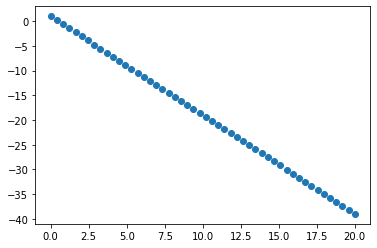

In [410]:
plt.scatter(X,y)

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [411]:
def Gd (A,b,alpha,Max_iter):
    m=len(b)
    T0=0
    T1=0
    los=[]
    T0_all=[]
    T1_all=[]

    for i in range (Max_iter):
        T0_all.append(T0)
        T1_all.append(T1)

        h=T0+T1*A

        J=sum((h-y)**2/(2*m))
        los.append(J)

        d_T0=sum(h-b)/m
        d_T1=sum((h-b)*A)/m

        it=0
        
        G_vec=np.array([d_T0,d_T1])
        if np.linalg.norm(G_vec)<0.08:
            it =i
            break

        T0=T0-alpha*d_T0
        T1=T1-alpha*d_T1
        
    return (T0,T1,T0_all,T1_all,los,it)



#### Try your function with any input parameters of your choice.

In [412]:
w=Gd(X,y,0.01,1000)
t0=w[0]
t1=w[1]
loss=w[4]
t0_all=w[2]
t1_all=w[3]
con_after_num_of_iter=w[5]
print(f'converged after {w[5]} iterations')
print(w[0],w[1])


converged after 507 iterations
0.6887724659995189 -1.976849686065044


#### Calculate r2 score

In [413]:
h_pre=t0+t1*X


In [414]:
from sklearn.metrics import r2_score
print(r2_score(y,h_pre))

0.9998202153035282


In [415]:
epo=1000/len(y)
print(epo)


20.0


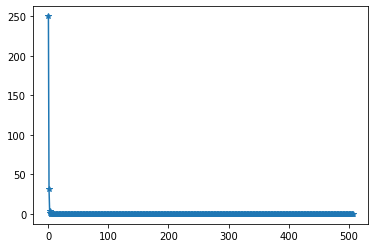

In [416]:
plt.plot(loss,'-*')

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

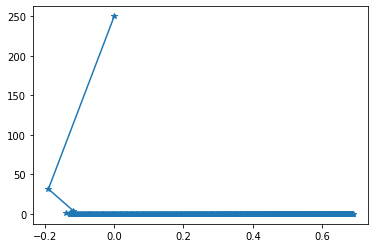

In [417]:
plt.plot(t0_all,loss,'-*')

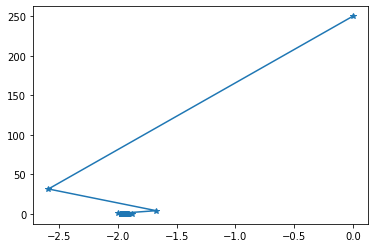

In [418]:
plt.plot(t1_all,loss,'-*')

#### Plot the best regression line

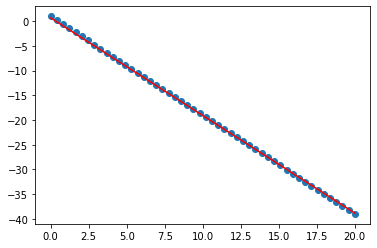

In [419]:
plt.scatter(X,y)
plt.plot(X,h_pre,'-r')

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1, and the best regression line
#### Notice the difference in output.

In [420]:
z=Gd(X,y,0.0009,8000)
t00=z[0]
t11=z[1]
loss1=z[4]
t0_alll=z[2]
t1_alll=z[3]
con_after_num_of_iter=z[5]
print(f'converged after {z[5]} iterations')
print(z[0],z[1])

converged after 5637 iterations
0.6885635264768822 -1.9768341443310582


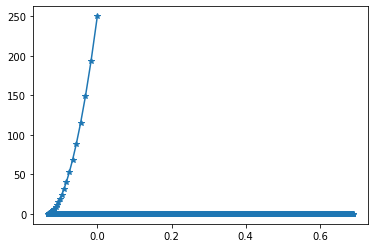

In [421]:
plt.plot(t0_alll,loss1,'-*')

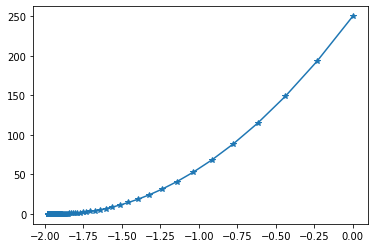

In [422]:
plt.plot(t1_alll,loss1,'-*')

In [423]:
h_pre1=t00+t11*X

In [424]:
print(r2_score(y,h_pre1))

0.9998199738291488


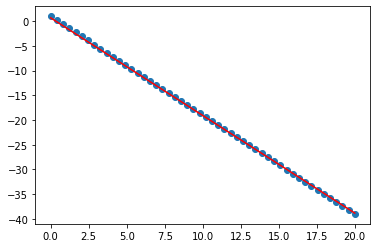

In [425]:
plt.scatter(X,y)
plt.plot(X,h_pre1,'-r')

In [426]:
k=Gd(X,y,0.00006,160)
losss1=k[4]
t000=k[0]
t111=k[1]
t0_allll=k[2]
t1_allll=k[3]



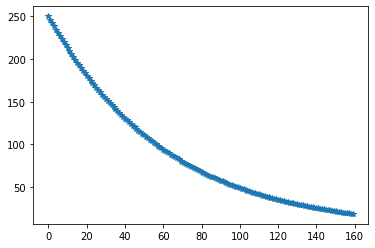

In [427]:
plt.plot(losss1,'-*')

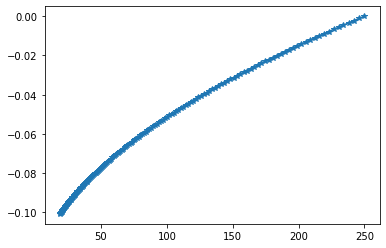

In [428]:
plt.plot(losss1,t0_allll,'-*')


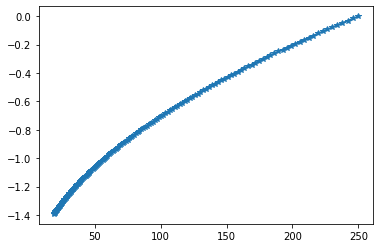

In [429]:
plt.plot(losss1,t1_allll,'-*')


In [430]:
h_pree=t000+t111*X


In [431]:
print(r2_score(y,h_pree))

0.7332176053348648


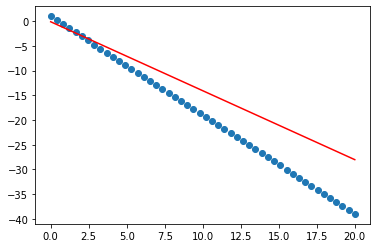

In [432]:
plt.scatter(X,y)
plt.plot(X,h_pree,'-r')

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
### Note: Do Not forget to shuffle your data. However, you can try without shuffle and see the difference.

In [433]:
def Gd_Mini (A,b,alpha,Max_epo,batch_size):
    m=len(b)
    T0=0
    T1=0
    los=[]
    T0_all=[]
    T1_all=[]
    nbatch=(len(A)/batch_size)
    Z=np.array_split(A,nbatch)
    k=np.array_split(b,nbatch)
    a=np.array(Z)
    u=np.array(k)
    for r in range(Max_epo):
        for f in range (int(nbatch)):
            v=a[f]
            T0_all.append(T0)
            T1_all.append(T1)

            h=T0+T1*v
            
            J=sum((h-u[f])**2/(2*batch_size))
            los.append(J)

            d_T0=sum(h-u[f])/batch_size
            d_T1=sum((h-u[f])*v)/batch_size
            
            T0=T0-alpha*d_T0
            T1=T1-alpha*d_T1
            G_vec=np.array([d_T0,d_T1])
            if np.linalg.norm(G_vec)<0.07:
               itr=r*nbatch
               break
        
    return (T0,T1,T0_all,T1_all,los,itr)

In [434]:
o=Gd_Mini(X,y,0.005,2000,25)
tttt=o[0]
ffff=o[1]
lossess=o[4]
t0_aaall=o[2]
t1_aaall=o[3]
con_after_num_of_iter=o[5]
print(f'converged after {o[5]} iterations')
print(z[0],z[1])



converged after 3998.0 iterations
0.6885635264768822 -1.9768341443310582


In [435]:
h_r=tttt+ffff*X

In [436]:
from sklearn.metrics import r2_score
print(r2_score(y,h_r))

0.9999991051079155


#### Learning rate 0.0005
#### Mini-Batch size 5

In [437]:
ww=Gd_Mini(X,y,0.0005,2000,5)
ttt=ww[0]
fff=ww[1]
lssess=ww[4]
t0_a0all=ww[2]
t1_a0all=ww[3]
con_after_num_of_iter=ww[5]
print(f'converged after {ww[5]} iterations')
print(ww[0],ww[1])
hhh=ttt+fff*X

converged after 19990.0 iterations
0.9032663201812174 -1.9916825139479026


In [438]:
from sklearn.metrics import r2_score
print(r2_score(y,hhh))

0.9999813801156409


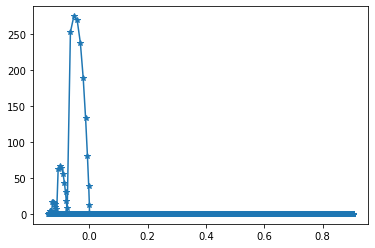

In [439]:
plt.plot(t0_a0all,lssess,'-*')

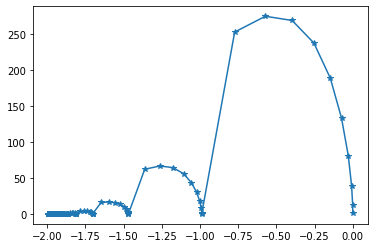

In [440]:
plt.plot(t1_a0all,lssess,'-*')

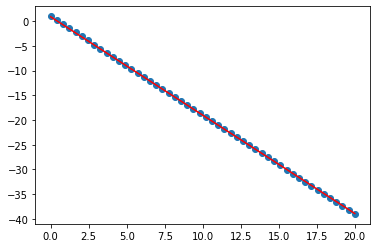

In [441]:
plt.scatter(X,y)
plt.plot(X,hhh,'-r')

#### Learning rate 0.0005
#### Mini-Batch size 10

In [442]:
www=Gd_Mini(X,y,0.0005,5000,10)
ttt0=www[0]
fff1=www[1]
lssess1=www[4]
t0_a0all0=www[2]
t1_a0all0=www[3]
con_after_num_of_iter=www[5]
print(f'converged after {www[5]} iterations')
print(www[0],www[1])
hhh0=ttt+fff*X

converged after 24990.0 iterations
0.9544999293437053 -1.9965825469839513


In [443]:
from sklearn.metrics import r2_score
print(r2_score(y,hhh0))

0.9999813801156409


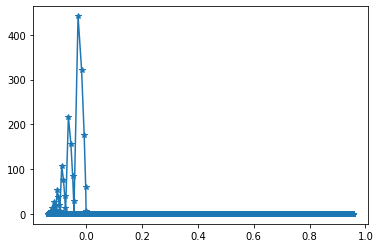

In [444]:
plt.plot(t0_a0all0,lssess1,'-*')

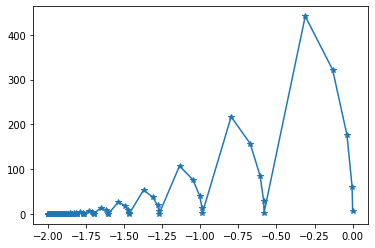

In [445]:
plt.plot(t1_a0all0,lssess1,'-*')

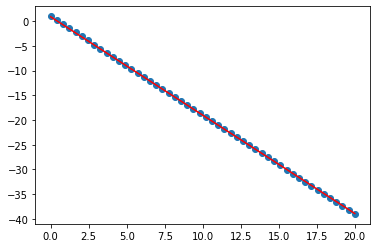

In [446]:
plt.scatter(X,y)
plt.plot(X,hhh0,'-r')

#### Learning rate 0.0005
#### Mini-Batch size 20

In [447]:
www0=Gd_Mini(X,y,0.0005,20000,20)
ttt00=www0[0]
fff11=www0[1]
lssess11=www0[4]
t0_a0all00=www0[2]
t1_a0all00=www0[3]
con_after_num_of_iter=www0[5]
print(f'converged after {www0[5]} iterations')
print(www0[0],www0[1])
hhh00=ttt+fff*X

converged after 49997.5 iterations
0.9938811925813119 -1.9990748285758317


In [448]:
from sklearn.metrics import r2_score
print(r2_score(y,hhh00))

0.9999813801156409


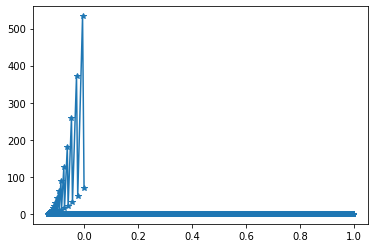

In [449]:
plt.plot(t0_a0all00,lssess11,'-*')

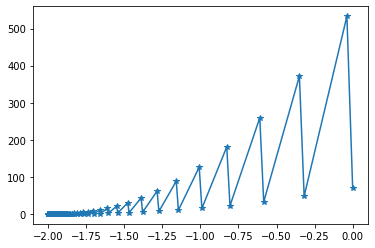

In [450]:
plt.plot(t1_a0all00,lssess11,'-*')

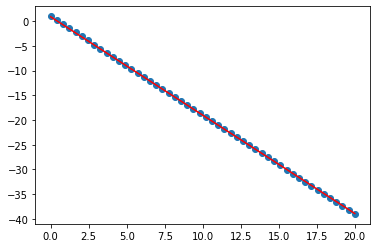

In [451]:
plt.scatter(X,y)
plt.plot(X,hhh00,'-r')

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD
### Note: Do Not forget to shuffle your data. However, you can try without shuffle and see the difference.

In [452]:
def Gd_St (A,b,alpha,Max_epo):
    m=len(b)
    T0=0
    T1=0
    los=[]
    T0_all=[]
    T1_all=[]

    for f in range (Max_epo):
        for j in range (m):
            T0_all.append(T0)
            T1_all.append(T1)

            h=T0+T1*A[j]

            J=(h-y[j])/2
            los.append(J)

            d_T0=h-y[j] 
            d_T1=(h-y[j])*X[j]

            
            T0=T0-alpha*d_T0
            T1=T1-alpha*d_T1
        
        G_vec=np.array([d_T0,d_T1])
        if np.linalg.norm(G_vec)<0.08:
            epo =f
            itr=f*m
            break

        
    return (T0,T1,T0_all,T1_all,los,epo,itr)

#### Learning rate 0.0005

In [453]:
d=Gd_St(X,y,0.005,100)
loosss1=d[4]
tt00=d[0]
tt11=d[1]
tt0_allll=d[2]
tt1_allll=d[3]
numof_epo=d[5]
numofitr=d[6]
print(numof_epo)
print(numofitr)
hpre=tt00+tt11*X

33
1650


In [454]:
print(r2_score(y,hpre))

0.9996548272125775


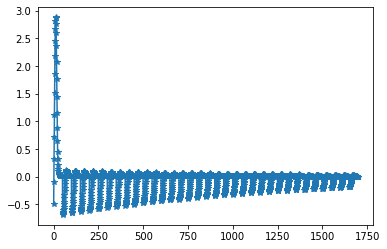

In [455]:
plt.plot(loosss1,'-*')

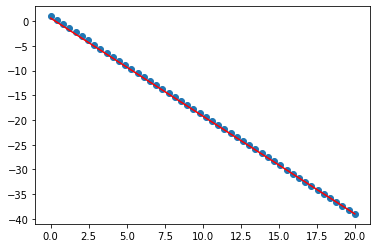

In [456]:
plt.scatter(X,y)
plt.plot(X,hpre,'-r')

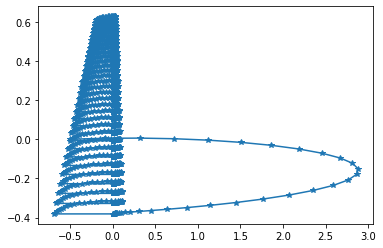

In [457]:
plt.plot(loosss1,tt0_allll,'-*')

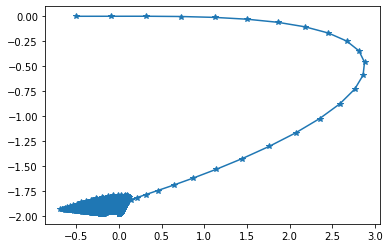

In [458]:
plt.plot(loosss1,tt1_allll,'-*')

**Shuffle X,y**

In [459]:
v=np.concatenate((X.reshape(-1,1),y.reshape(-1,1)),axis=1)
np.random.shuffle(v)
X=v[:,0]
y=v[:,1]

In [460]:
p=Gd_St(X,y,0.0005,1000)
loosss1=p[4]
tt00=p[0]
tt11=p[1]
tt0_allll=p[2]
tt1_allll=p[3]
numof_epo=p[5]
numofitr=p[6]
print(numof_epo)
print(numofitr)
hpre=tt00+tt11*X

605
30250


In [461]:
print(r2_score(y,hpre))

0.9999990255276503


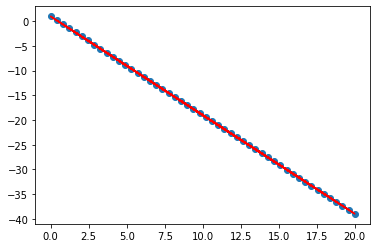

In [462]:
plt.scatter(X,y)
plt.plot(X,hpre,'-r')

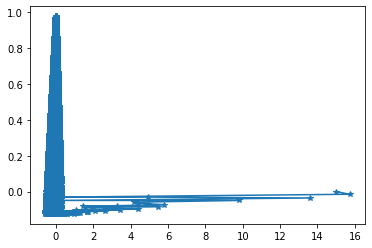

In [463]:
plt.plot(loosss1,tt0_allll,'-*')

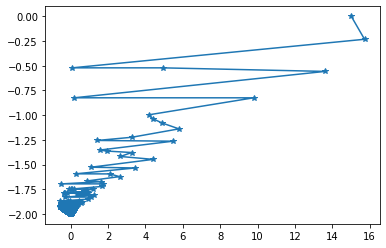

In [464]:
plt.plot(loosss1,tt1_allll,'-*')